# Bank Customer Churns Prediction (Logistic Regression + MLP)

This project aim to apply predictive analytics tools to predict customer churn in the bank. Since identifying factors that affect churn rate and develop corresponding strategies are extremely important, rather than applying difficult model, I decided to use Logistic Regression, which is simple but one of the most interpretable models, for prediction. I also used MLP to help me improve my logistic regression model.
Eventually, the Logistic Regression has improved from 80% accuracy to 85.3% accuracy.

Data provided by Kaggle (https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers)

In [864]:
import pandas as pd
import pyrsm as rsm
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
import statsmodels.formula.api as smf

In [865]:
import warnings
warnings.filterwarnings("ignore")

In [866]:
df = pd.read_csv("data/Churn_Modelling.csv")

In [867]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [868]:
df.shape

(10000, 14)

In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [870]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot: >

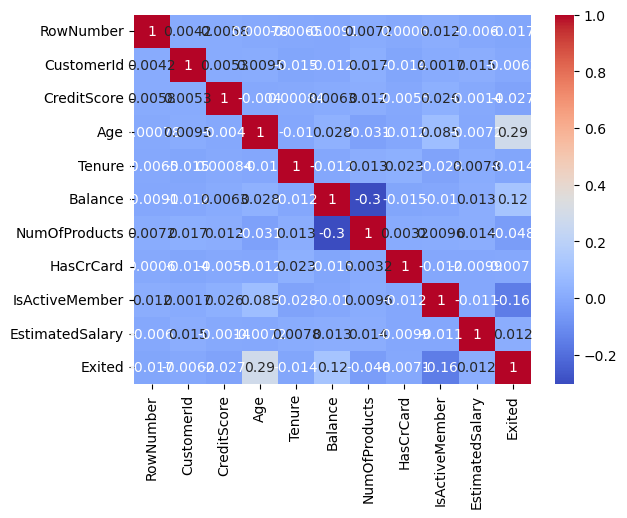

In [871]:
# Check correlation to prevent multicollinearity
import seaborn as sns
import pandas as pd
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [872]:
num_unique = df['Surname'].nunique()
print(num_unique)

2932


Here I drop the first three columns, which are distinct or high cardinality

In [873]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

No plot will be created for Geography (type object)
No plot will be created for Gender (type object)


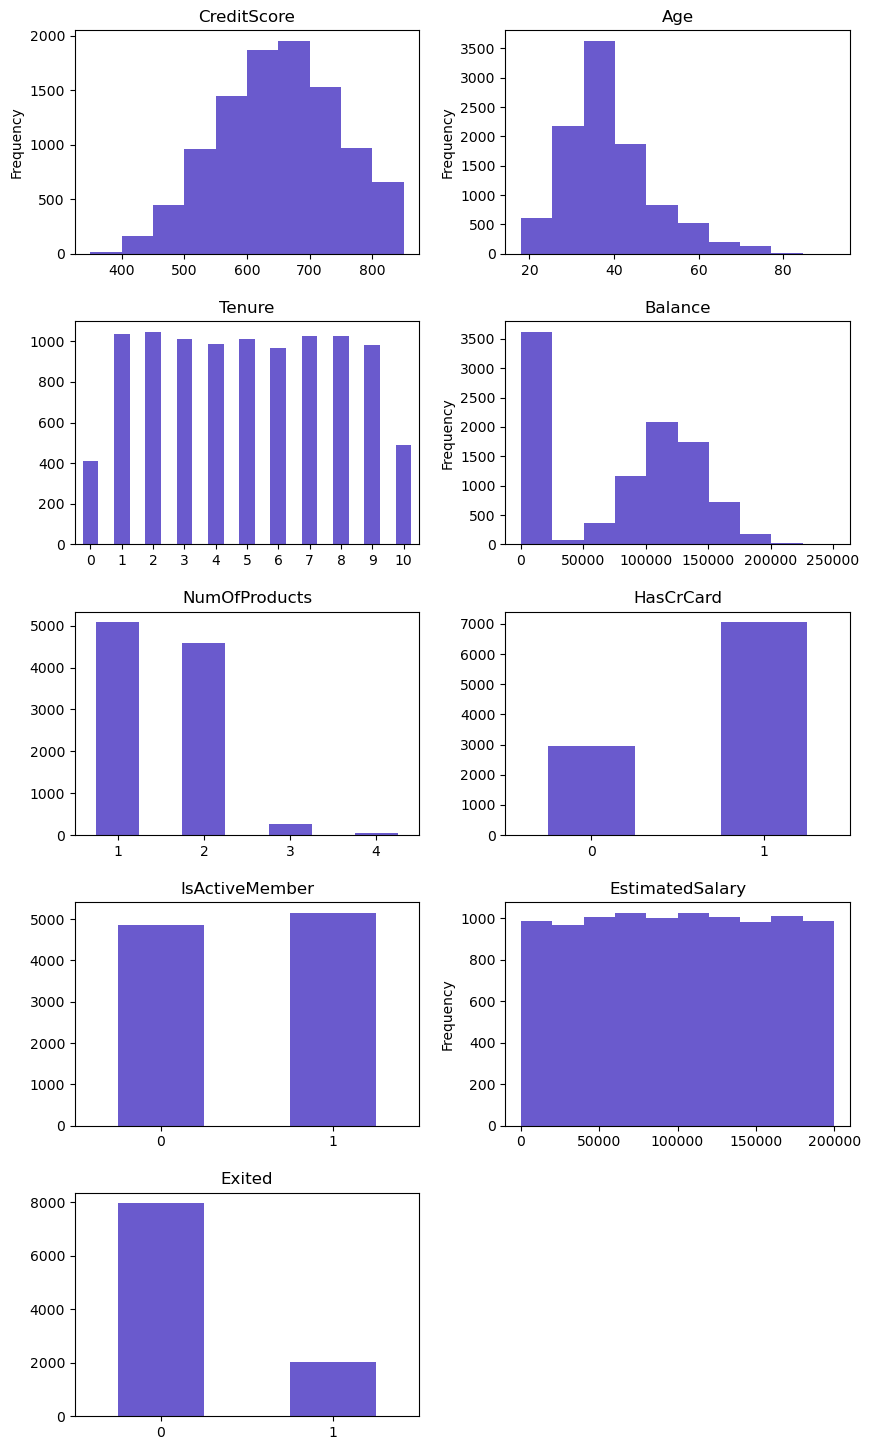

In [874]:
rsm.distr_plot(df)

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<AxesSubplot: xlabel='Geography'>

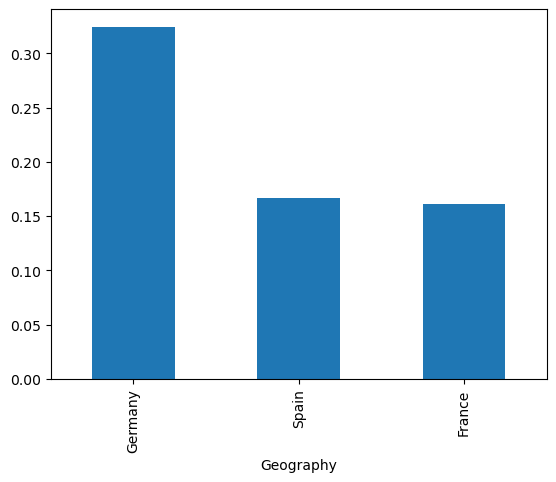

In [876]:
df.groupby('Geography').mean()['Exited'].sort_values(ascending=False).plot.bar()

<AxesSubplot: xlabel='Gender'>

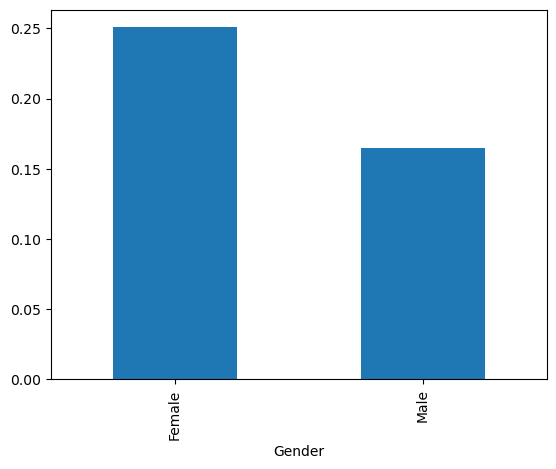

In [877]:
df.groupby('Gender').mean()['Exited'].sort_values(ascending=False).plot.bar()

In [878]:
df['Geography'] = df['Geography'].astype("category")
df['Gender'] = df['Gender'].astype("category")

In [879]:
from sklearn.model_selection import StratifiedShuffleSplit 

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
df["training"] = 0
for train_index, test_index in sss.split(df, df["Exited"]):
    df.iloc[train_index, df.columns.get_loc("training")] = 1

In [880]:
train_data = df[df['training']==1]
test_data = df[df['training']==0]

In [881]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=1234)
test_data["training"] = 0
for train_index, test_index in sss.split(test_data, test_data["Exited"]):
    test_data.iloc[train_index, test_data.columns.get_loc("training")] = 1

In [882]:
val_data = test_data[test_data['training']==1]
test_data = test_data[test_data['training']==0]

In [883]:
print(len(train_data),len(val_data),len(test_data))

8000 1000 1000


#### Logistic Regression

In [884]:
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
from sklearn.neural_network import MLPClassifier

In [885]:
lr= smf.glm(
    formula="Exited ~ CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember +EstimatedSalary",
    family=Binomial(link=logit()),
    data=train_data,
).fit()


lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3419.3
Date:                Fri, 31 Mar 2023   Deviance:                       6838.5
Time:                        23:48:40   Pearson chi2:                 8.15e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1447
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.6484      0.276    -13.222      0.000      -4.189      -3.108
Geography[T.Germany]     0.7788      0.075     10.315      0.000       0.631       0.927
Geography[T.Spain]       0.0407      0.079      0.516      0.606      -0.114       0.195
Gender[T.Male]          -0.5133      0.061     -8.420      0.000      -0.633      -0.394
CreditScore             -0.0005      0.000     -1.520      0.129      -0.001       0.000
Age                      0.0732      0.003     25.352      0.000       0.068       0.079
Tenure                  -0.0163      0.010     -1.554      0.120      -0.037       0.004
Balance               3.033e-06   5.75e-07      5.274      0.000    1.91e-06    4.16e-06
NumOfProducts           -0.0516      0.052     -0.991      0.322      -0.154       0.050
HasCrCard               -0.0526      0.066     -0.795      0.427      -0.182       0.077
IsActiveMember          -1.0842      0.064    -16.833      0.000      -1.210      -0.958
EstimatedSalary       5.789e-07   5.32e-07      1.088      0.277   -4.64e-07    1.62e-06
========================================================================================
"""

In [886]:
pred_train = lr.predict(train_data)
train_data['prediction'] = np.where(pred_train>0.5,1,0)
accuracy = accuracy_score(train_data['prediction'], train_data['Exited'])
accuracy

0.811

In [887]:
pred_val = lr.predict(val_data)
val_data['prediction'] = np.where(pred_val>0.5,1,0)
accuracy = accuracy_score(val_data['prediction'], val_data['Exited'])
accuracy

0.811

In [888]:
# For test set

In [889]:
pred_test = lr.predict(test_data)

In [890]:
test_data['prediction'] = np.where(pred_test>0.5,1,0)

In [891]:
accuracy = accuracy_score(test_data['prediction'], test_data['Exited'])
accuracy

0.803

The accuracy of original model is 80.3%

#### MLP

In [987]:
#df['NumOfProducts'] = df['NumOfProducts'].astype("category")

In [969]:
df_std = rsm.scale_df(df, excl=["Exited"])
df_std

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,training
0,-0.163111,France,Female,0.146759,-0.520880,-0.612924,1,1,1,0.010943,1,0
1,-0.220018,Spain,Female,0.099082,-0.693769,0.058675,1,0,1,0.108267,0,1
2,-0.768397,France,Female,0.146759,0.516454,0.666527,3,1,0,0.120343,1,1
3,0.250760,France,Female,0.003728,-0.693769,-0.612924,2,0,0,-0.054459,0,1
4,1.031942,Spain,Female,0.194436,-0.520880,0.392864,1,1,1,-0.182638,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.623244,France,Male,0.003728,-0.002213,-0.612924,2,1,0,-0.033210,0,1
9996,-0.695970,France,Male,-0.186979,0.862232,-0.153189,1,1,1,0.013994,0,0
9997,0.302494,France,Female,-0.139302,0.343565,-0.612924,1,0,1,-0.504322,1,1
9998,0.628418,Germany,Male,0.146759,-0.347991,-0.011304,2,1,0,-0.062615,1,0


In [970]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
df_std["training"] = 0
for train_index, test_index in sss.split(df_std, df_std["Exited"]):
    df_std.iloc[train_index, df_std.columns.get_loc("training")] = 1

In [971]:
train_data_std = df_std[df_std['training']==1]
test_data_std = df_std[df_std['training']==0]

In [972]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=1234)
test_data_std["training"] = 0
for train_index, test_index in sss.split(test_data_std, test_data_std["Exited"]):
    test_data_std.iloc[train_index, test_data_std.columns.get_loc("training")] = 1

In [973]:
val_data_std = test_data_std[test_data_std['training']==1]
test_data_std = test_data_std[test_data_std['training']==0]

In [974]:
y = train_data_std['Exited']
y_val = val_data_std['Exited']
y_test = test_data_std['Exited'] 

In [975]:
X = pd.get_dummies(train_data_std.drop(['Exited','training'], axis=1), drop_first=True)
X_val = pd.get_dummies(val_data_std.drop(['Exited','training'], axis=1), drop_first=True)
X_test = pd.get_dummies(test_data_std.drop(['Exited','training'], axis=1), drop_first=True)

In [976]:
def nn(X, y, hlsizes=(1,), alpha=0.0001, max_iter=10000):
    return MLPClassifier(
        activation="tanh",
        solver="lbfgs",
        hidden_layer_sizes=hlsizes,
        alpha=alpha,
        random_state=1234,
        max_iter=max_iter,
    ).fit(X, y)

In [1032]:
clf = nn(X, y, hlsizes=(3,3))

In [1033]:
train_pred = clf.predict(X)
accuracy_score(train_pred, list(y))

0.86325

In [1034]:
val_pred = clf.predict(X_val)
accuracy_score(val_pred, list(y_val))

0.872

In [1035]:
test_pred = clf.predict(X_test)

In [1036]:
accuracy_score(test_pred, list(y_test))

0.861

The accuracy of mlp is much higher than logistic regression. I further compare their permutation importance to find out the difference.

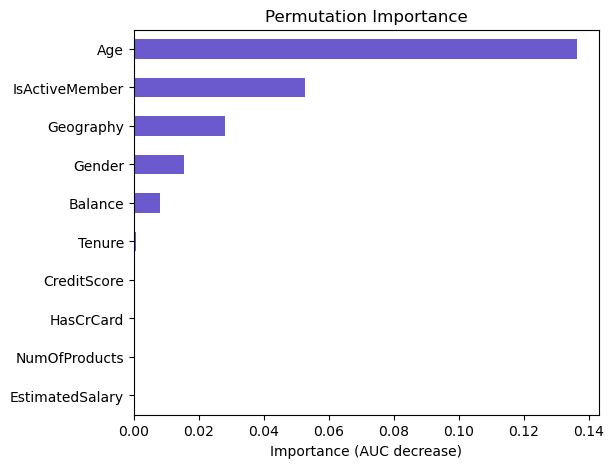

In [922]:
rsm.vimp_plot_sm(lr, train_data)

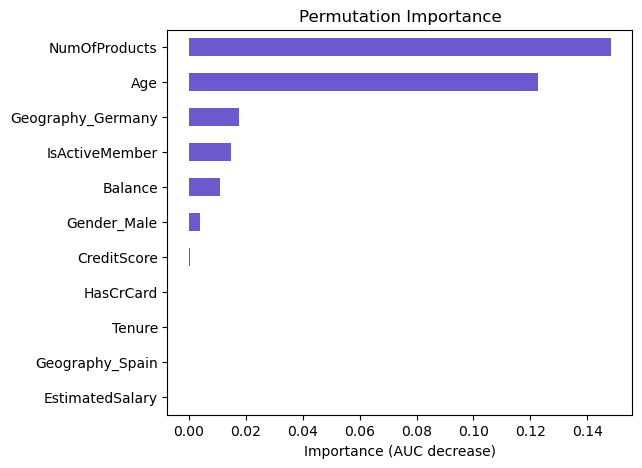

In [923]:
fig = rsm.vimp_plot_sk(clf, X, y)

The permutation importance of NumOfProducts is approximate 0 for the logistic regression. For the neural network model, on the other hand, the permutation importance of NumOfProducts is surprisingly the highest. I conducted more analysis about the column.

In [924]:
df['NumOfProducts'] = df['NumOfProducts'].astype("category")

<AxesSubplot: xlabel='NumOfProducts'>

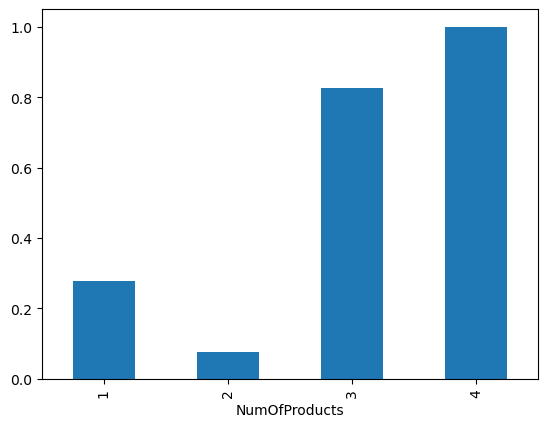

In [925]:
df.groupby('NumOfProducts').mean()['Exited'].plot.bar()

As the plot shows, the distribution is not linear. Therefore, I change the column to category to get non-linear feature.

In [926]:
train_data["NumOfProducts"]= train_data['NumOfProducts'].astype("category")
val_data["NumOfProducts"]= val_data['NumOfProducts'].astype("category")
test_data["NumOfProducts"]= test_data['NumOfProducts'].astype("category")

In [927]:
lr2 = smf.glm(
    formula="Exited ~ CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember +EstimatedSalary",
    family=Binomial(link=logit()),
    data=train_data,
).fit()


lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2948.4
Date:                Sat, 01 Apr 2023   Deviance:                       5896.8
Time:                        09:00:32   Pearson chi2:                 8.51e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.2397
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.9740      0.286    -10.413      0.000      -3.534      -2.414
Geography[T.Germany]     0.9945      0.082     12.142      0.000       0.834       1.155
Geography[T.Spain]       0.0955      0.085      1.120      0.263      -0.072       0.263
Gender[T.Male]          -0.4782      0.066     -7.221      0.000      -0.608      -0.348
NumOfProducts[T.2]      -1.5516      0.080    -19.339      0.000      -1.709      -1.394
NumOfProducts[T.3]       2.6831      0.201     13.335      0.000       2.289       3.078
NumOfProducts[T.4]      25.3263   1.75e+04      0.001      0.999   -3.44e+04    3.44e+04
CreditScore             -0.0006      0.000     -1.643      0.100      -0.001       0.000
Age                      0.0717      0.003     23.100      0.000       0.066       0.078
Tenure                  -0.0220      0.011     -1.935      0.053      -0.044       0.000
Balance              -5.312e-07   6.43e-07     -0.826      0.409   -1.79e-06    7.29e-07
HasCrCard               -0.0586      0.072     -0.815      0.415      -0.200       0.082
IsActiveMember          -1.1134      0.070    -15.929      0.000      -1.250      -0.976
EstimatedSalary       5.799e-07   5.79e-07      1.001      0.317   -5.56e-07    1.72e-06
========================================================================================
"""

Pseudo R-Squared has great improvement after changing data type

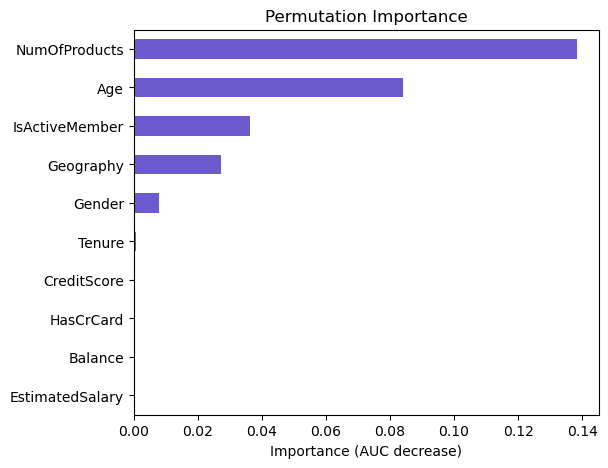

In [928]:
rsm.vimp_plot_sm(lr2, train_data)

As the plot shows, NumOfProducts now has the highest permutation importance

I further remove columns that are not statistically significant and have low permutation importance

In [929]:
lr3= smf.glm(
    formula="Exited ~ CreditScore + Geography + Gender + Age + Balance + NumOfProducts + IsActiveMember",
    family=Binomial(link=logit()),
    data=train_data,
).fit()


lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2951.1
Date:                Sat, 01 Apr 2023   Deviance:                       5902.3
Time:                        09:00:50   Pearson chi2:                 8.50e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.2392
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.0631      0.268    -11.429      0.000      -3.588      -2.538
Geography[T.Germany]     0.9921      0.082     12.118      0.000       0.832       1.153
Geography[T.Spain]       0.0970      0.085      1.139      0.255      -0.070       0.264
Gender[T.Male]          -0.4786      0.066     -7.231      0.000      -0.608      -0.349
NumOfProducts[T.2]      -1.5493      0.080    -19.319      0.000      -1.706      -1.392
NumOfProducts[T.3]       2.6828      0.201     13.351      0.000       2.289       3.077
NumOfProducts[T.4]      25.3112   1.76e+04      0.001      0.999   -3.44e+04    3.45e+04
CreditScore             -0.0006      0.000     -1.640      0.101      -0.001       0.000
Age                      0.0715      0.003     23.065      0.000       0.065       0.078
Balance              -5.122e-07   6.43e-07     -0.797      0.425   -1.77e-06    7.47e-07
IsActiveMember          -1.1070      0.070    -15.871      0.000      -1.244      -0.970
========================================================================================
"""

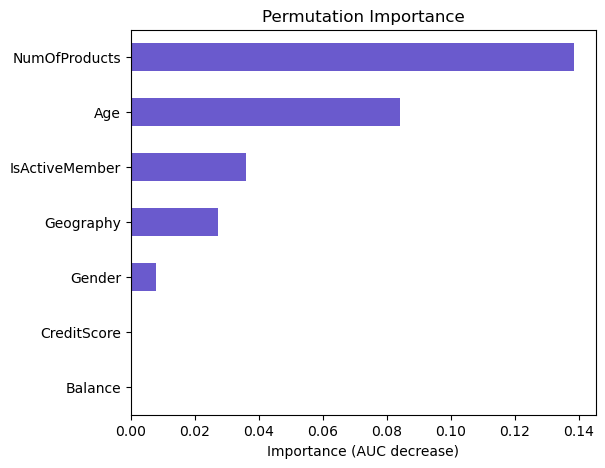

In [930]:
rsm.vimp_plot_sm(lr3, train_data)

Since the permutation importance is still slightly different between logistic regression and MLP, I decided to checked if NumOfProducts has any interaction with other columns.

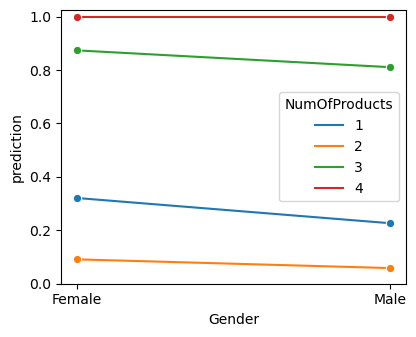

In [931]:
rsm.pred_plot_sm(lr3, train_data, incl=[], incl_int="Gender:NumOfProducts")

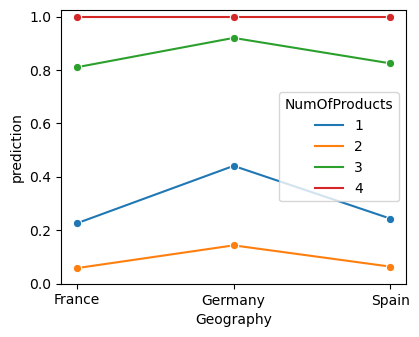

In [932]:
rsm.pred_plot_sm(lr3, train_data, incl=[], incl_int="Geography:NumOfProducts")

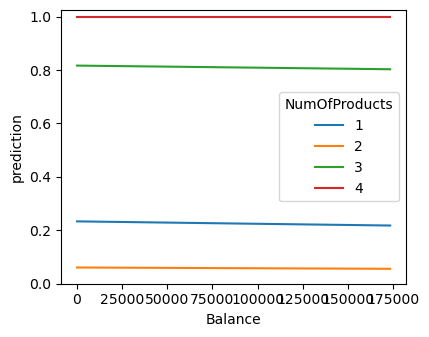

In [933]:
rsm.pred_plot_sm(lr3, train_data, incl=[], incl_int="NumOfProducts:Balance")

I picked three interactions I observed and put in the model

In [934]:
lr4= smf.glm(
    formula="Exited ~ CreditScore + Geography + Gender + Age + Balance + NumOfProducts + IsActiveMember +\
    NumOfProducts:Gender + NumOfProducts:Geography  + NumOfProducts:Balance ",
    family=Binomial(link=logit()),
    data=train_data,
).fit()


lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7977
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.1
Date:                Sat, 01 Apr 2023   Deviance:                       5730.2
Time:                        09:01:15   Pearson chi2:                 8.33e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.2553
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -2.6717      0.274     -9.763      0.000      -3.208      -2.135
Geography[T.Germany]                        1.1898      0.095     12.554      0.000       1.004       1.376
Geography[T.Spain]                          0.0080      0.102      0.078      0.938      -0.193       0.209
Gender[T.Male]                             -0.3840      0.079     -4.883      0.000      -0.538      -0.230
NumOfProducts[T.2]                         -2.4708      0.172    -14.346      0.000      -2.808      -2.133
NumOfProducts[T.3]                          1.5641      0.389      4.023      0.000       0.802       2.326
NumOfProducts[T.4]                         24.6976   4.23e+04      0.001      1.000   -8.28e+04    8.29e+04
NumOfProducts[T.2]:Gender[T.Male]          -0.3074      0.157     -1.961      0.050      -0.615      -0.000
NumOfProducts[T.3]:Gender[T.Male]          -0.1147      0.427     -0.269      0.788      -0.951       0.721
NumOfProducts[T.4]:Gender[T.Male]           0.5104   4.01e+04   1.27e-05      1.000   -7.87e+04    7.87e+04
NumOfProducts[T.2]:Geography[T.Germany]    -1.0661      0.195     -5.481      0.000      -1.447      -0.685
NumOfProducts[T.3]:Geography[T.Germany]    -3.0727      0.962     -3.193      0.001      -4.959      -1.187
NumOfProducts[T.4]:Geography[T.Germany]    -1.3395   4.14e+04  -3.24e-05      1.000   -8.11e+04    8.11e+04
NumOfProducts[T.2]:Geography[T.Spain]       0.3007      0.199      1.509      0.131      -0.090       0.691
NumOfProducts[T.3]:Geography[T.Spain]       0.4218      0.546      0.773      0.439      -0.647       1.491
NumOfProducts[T.4]:Geography[T.Spain]       0.0261   5.74e+04   4.55e-07      1.000   -1.13e+05    1.13e+05
CreditScore                                -0.0006      0.000     -1.719      0.086      -0.001    8.37e-05
Age                                         0.0721      0.003     22.794      0.000       0.066       0.078
Balance                                 -5.657e-06    7.7e-07     -7.344      0.000   -7.17e-06   -4.15e-06
NumOfProducts[T.2]:Balance               1.683e-05   1.41e-06     11.926      0.000    1.41e-05    1.96e-05
NumOfProducts[T.3]:Balance               3.384e-05   8.08e-06      4.190      0.000     1.8e-05    4.97e-05
NumOfProducts[T.4]:Balance               9.019e-06      0.361    2.5e-05      1.000      -0.707       0.707
IsActiveMember                             -1.0887      0.070    -15.447      0.000      -1.227      -0.951
===========================================================================================================
"""

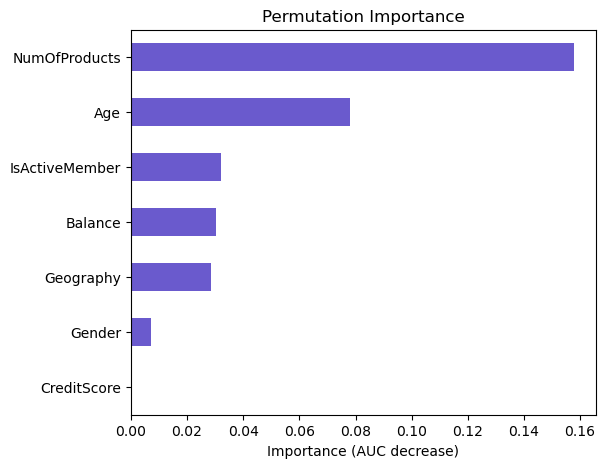

In [935]:
rsm.vimp_plot_sm(lr4, train_data)

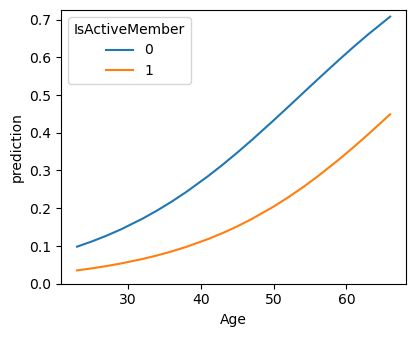

In [936]:
rsm.pred_plot_sm(lr4, train_data, incl=[], incl_int="Age:IsActiveMember")

In [1005]:
lr5= smf.glm(
    formula="Exited ~ CreditScore + Geography + Gender + Age + Balance + NumOfProducts + IsActiveMember +\
    NumOfProducts:Gender + NumOfProducts:Geography  + NumOfProducts:Balance +\
    + Age:IsActiveMember + Age:Balance",
    family=Binomial(link=logit()),
    data=train_data,
).fit()


lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7975
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2776.9
Date:                Sat, 01 Apr 2023   Deviance:                       5553.9
Time:                        09:20:07   Pearson chi2:                 8.61e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.2716
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -4.8059      0.401    -11.973      0.000      -5.593      -4.019
Geography[T.Germany]                        1.1976      0.097     12.342      0.000       1.007       1.388
Geography[T.Spain]                          0.0351      0.105      0.335      0.737      -0.170       0.240
Gender[T.Male]                             -0.3739      0.080     -4.649      0.000      -0.532      -0.216
NumOfProducts[T.2]                         -2.4281      0.177    -13.727      0.000      -2.775      -2.081
NumOfProducts[T.3]                          1.5999      0.384      4.167      0.000       0.847       2.352
NumOfProducts[T.4]                         24.7276   4.06e+04      0.001      1.000   -7.96e+04    7.96e+04
NumOfProducts[T.2]:Gender[T.Male]          -0.3371      0.161     -2.099      0.036      -0.652      -0.022
NumOfProducts[T.3]:Gender[T.Male]          -0.1206      0.422     -0.286      0.775      -0.947       0.706
NumOfProducts[T.4]:Gender[T.Male]           0.5117   3.78e+04   1.35e-05      1.000    -7.4e+04     7.4e+04
NumOfProducts[T.2]:Geography[T.Germany]    -1.1077      0.199     -5.559      0.000      -1.498      -0.717
NumOfProducts[T.3]:Geography[T.Germany]    -3.1537      0.949     -3.323      0.001      -5.014      -1.294
NumOfProducts[T.4]:Geography[T.Germany]    -1.4907   3.93e+04   -3.8e-05      1.000    -7.7e+04     7.7e+04
NumOfProducts[T.2]:Geography[T.Spain]       0.2608      0.204      1.278      0.201      -0.139       0.661
NumOfProducts[T.3]:Geography[T.Spain]       0.2797      0.540      0.518      0.604      -0.778       1.338
NumOfProducts[T.4]:Geography[T.Spain]      -0.1005   5.44e+04  -1.85e-06      1.000   -1.07e+05    1.07e+05
CreditScore                                -0.0005      0.000     -1.522      0.128      -0.001       0.000
Age                                         0.1240      0.008     16.167      0.000       0.109       0.139
Balance                                 -8.666e-06    2.5e-06     -3.460      0.001   -1.36e-05   -3.76e-06
NumOfProducts[T.2]:Balance               1.689e-05   1.45e-06     11.683      0.000    1.41e-05    1.97e-05
NumOfProducts[T.3]:Balance               3.403e-05   7.97e-06      4.270      0.000    1.84e-05    4.97e-05
NumOfProducts[T.4]:Balance               8.886e-06      0.344   2.58e-05      1.000      -0.675       0.675
IsActiveMember                              2.6837      0.304      8.829      0.000       2.088       3.279
Age:IsActiveMember                         -0.0901      0.007    -12.622      0.000      -0.104      -0.076
Age:Balance                              7.118e-08   5.64e-08      1.263      0.207   -3.93e-08    1.82e-07
===========================================================

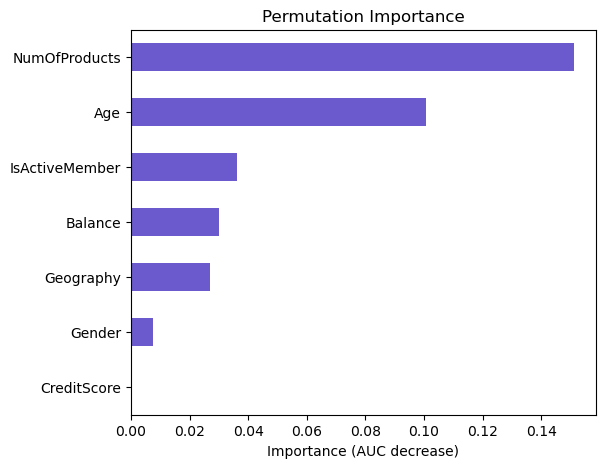

In [1006]:
rsm.vimp_plot_sm(lr5, train_data)

In [1055]:
pred_train = lr5.predict(train_data)
train_data['prediction'] = np.where(pred_train>0.5,1,0)
accuracy = accuracy_score(train_data['prediction'], train_data['Exited'])
accuracy

0.857375

In [1007]:
pred_val = lr5.predict(val_data)

In [1008]:
val_data['prediction'] = np.where(pred_val>0.5,1,0)
accuracy = accuracy_score(val_data['prediction'], val_data['Exited'])
accuracy

0.853

In [1009]:
pred_test = lr5.predict(test_data)

In [1010]:
test_data['prediction'] = np.where(pred_test>0.5,1,0)

In [1011]:
accuracy = accuracy_score(test_data['prediction'], test_data['Exited'])
accuracy

0.853

the accuracy increase to 85.3% after tuning

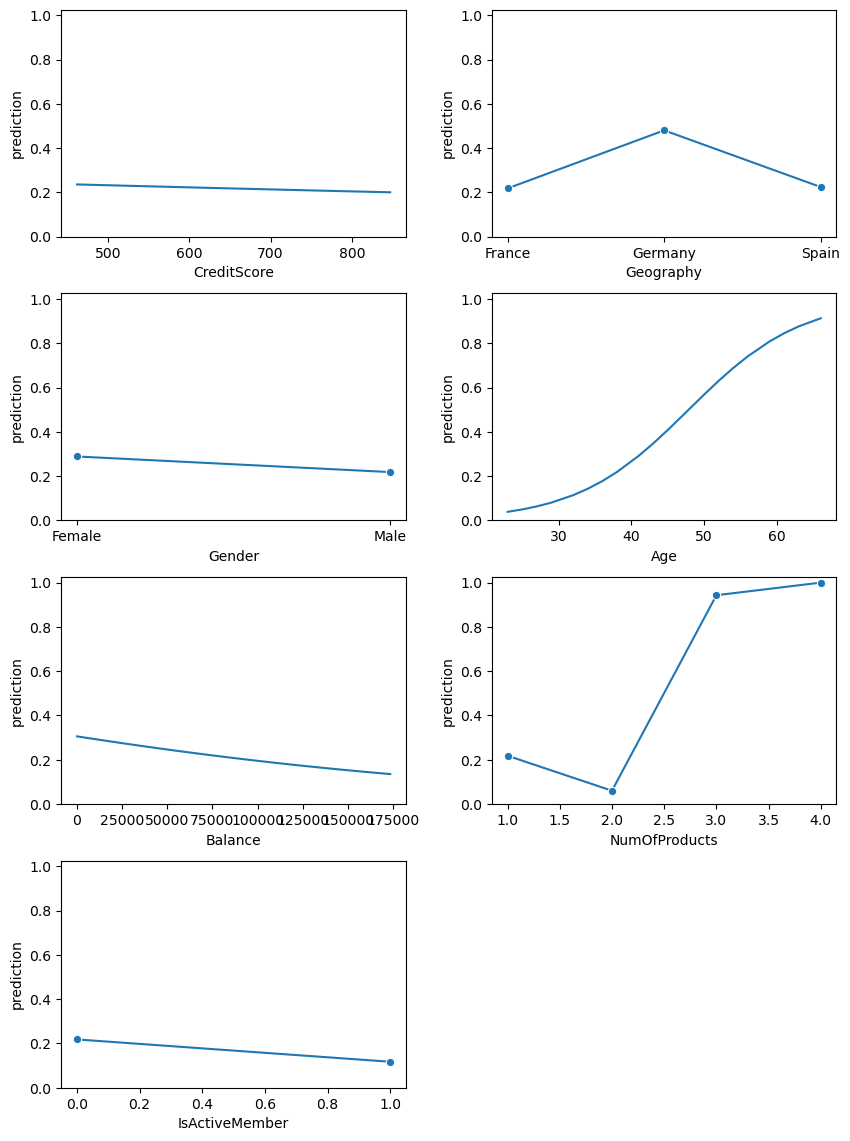

In [1051]:
rsm.pred_plot_sm(lr5, train_data)

We can further utilize tools such as prediction plot and variable coefficient to develop strategies.\
For instance, by applying regression model, we can predict churn rate to be reduced by 60% when targeting younger customers (assume average age * 0.8 and keep other variable constant).

In [1075]:
test_data["p_age0"] = lr5.predict(
    test_data.assign(Age=test_data.Age*0.8)
)

In [1076]:
test_data['p_age0'] = np.where(test_data["p_age0"]>0.5,1,0)

In [1077]:
test_data['prediction'].mean()

0.129

In [1078]:
test_data['p_age0'].mean()

0.051

In [1082]:
(test_data['p_age0'].mean() - test_data['prediction'].mean()) / test_data['prediction'].mean()

-0.6046511627906977